In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno
import re

In [119]:
df = pd.read_csv('data_02.csv')
df.drop(["Current MRP"],axis=1,inplace=True)
df.sample(5)

,Rating (Stars),Number of Reviews,Free Delivery,Brand,Storage,Color,New Bought Last Month,New Dashed MRP,New Discount (%),RAM
147,4.0,135.0,0,realme,256.0,Blue,0,25999.0,20.0,12.0
16,4.5,2431.0,1,apple,256.0,Blue,300,89600.0,15.0,6.0
56,4.1,1951.0,1,oneplus,128.0,Gray,100,33999.0,37.0,8.0
176,4.1,5149.0,0,samsung,128.0,Black,400,25999.0,33.0,8.0
105,3.3,99.0,1,oppo,256.0,Black,100,28999.0,21.0,8.0


```markdown
Feature	Recommended Scaling


rating_stars	    |  Min-Max Scaling

number_of_reviews   |	Standard Scaling

bought_last_month   |	Standard Scaling

original_mrp	    |  Standard Scaling

discount%	    |  Min-Max Scaling

storage_in_GB	    |  Standard Scaling

RAM_in_GB	    |  Standard Scaling


```
> NOW encoding the categorical variables

> Categorical variables are : brand and color

```markdown
Both are encoded using one hot encoding as the are **nominal** variables
```


In [120]:
df.columns

Index(['Rating (Stars)', 'Number of Reviews', 'Free Delivery', 'Brand',
       'Storage', 'Color', 'New Bought Last Month', 'New Dashed MRP',
       'New Discount (%)', 'RAM'],
      dtype='object')

In [121]:
min_val = df["Rating (Stars)"].min()
max_val = df["Rating (Stars)"].max()
df["Rating (Stars)"] = -1 + (df["Rating (Stars)"] - min_val) / (max_val - min_val) * 2
df["Rating (Stars)"] = df["Rating (Stars)"].round(6)

means = df["Number of Reviews"].mean()
std_devs = df["Number of Reviews"].std()
# Apply manual standard scaling: (value - mean) / std
df["Number of Reviews"] = (df["Number of Reviews"] - means) / std_devs

means = df["New Bought Last Month"].mean()
std_devs = df["New Bought Last Month"].std()
# Apply manual standard scaling: (value - mean) / std
df["New Bought Last Month"] = (df["New Bought Last Month"] - means) / std_devs

means = df["New Dashed MRP"].mean()
std_devs = df["New Dashed MRP"].std()
# Apply manual standard scaling: (value - mean) / std
df["New Dashed MRP"] = (df["New Dashed MRP"] - means) / std_devs

min_val = df["New Discount (%)"].min()
max_val = df["New Discount (%)"].max()
# Scale "New Discount (%)" to range [-1, 1]
df["New Discount (%)"] = -1 + (df["New Discount (%)"] - min_val) / (max_val - min_val) * 2
df["New Discount (%)"] = df["New Discount (%)"].round(6)

means = df["Storage"].mean()
std_devs = df["Storage"].std()
# Apply manual standard scaling: (value - mean) / std
df["Storage"] = (df["Storage"] - means) / std_devs

means = df["RAM"].mean()
std_devs = df["RAM"].std()
# Apply manual standard scaling: (value - mean) / std
df["RAM"] = (df["RAM"] - means) / std_devs

In [122]:
df = pd.get_dummies(df, columns=['Brand'], prefix='Brand')
df = pd.get_dummies(df, columns=['Color'], prefix='Color')
# df.sample(10)

In [123]:
df.columns

Index(['Rating (Stars)', 'Number of Reviews', 'Free Delivery', 'Storage',
       'New Bought Last Month', 'New Dashed MRP', 'New Discount (%)', 'RAM',
       'Brand_apple', 'Brand_oneplus', 'Brand_oppo', 'Brand_realme',
       'Brand_samsung', 'Brand_vivo', 'Brand_xiaomi', 'Color_Black',
       'Color_Black Titanium', 'Color_Blue', 'Color_Blue Titanium',
       'Color_Gold', 'Color_Gray', 'Color_Green', 'Color_Midnight',
       'Color_Natural Titanium', 'Color_Pink', 'Color_Purple', 'Color_Red',
       'Color_Silver', 'Color_Starlight', 'Color_White',
       'Color_White Titanium', 'Color_Yellow'],
      dtype='object')

In [124]:
cols_to_convert = ['Brand_apple', 'Brand_oneplus', 'Brand_oppo', 'Brand_realme',
                   'Brand_samsung', 'Brand_vivo', 'Brand_xiaomi', 'Color_Black',
                   'Color_Black Titanium', 'Color_Blue', 'Color_Blue Titanium',
                   'Color_Gold', 'Color_Gray', 'Color_Green', 'Color_Midnight',
                   'Color_Natural Titanium', 'Color_Pink', 'Color_Purple', 'Color_Red',
                   'Color_Silver', 'Color_Starlight', 'Color_White',
                   'Color_White Titanium', 'Color_Yellow']

df[cols_to_convert] = df[cols_to_convert].astype(int)
df["Free Delivery"].replace(0, -1, inplace=True)
# df.sample(5)

C:\Users\Dell\AppData\Local\Temp\ipykernel_17640\770377475.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Free Delivery"].replace(0, -1, inplace=True)


In [125]:
df.to_csv('data_03.csv', index=False)

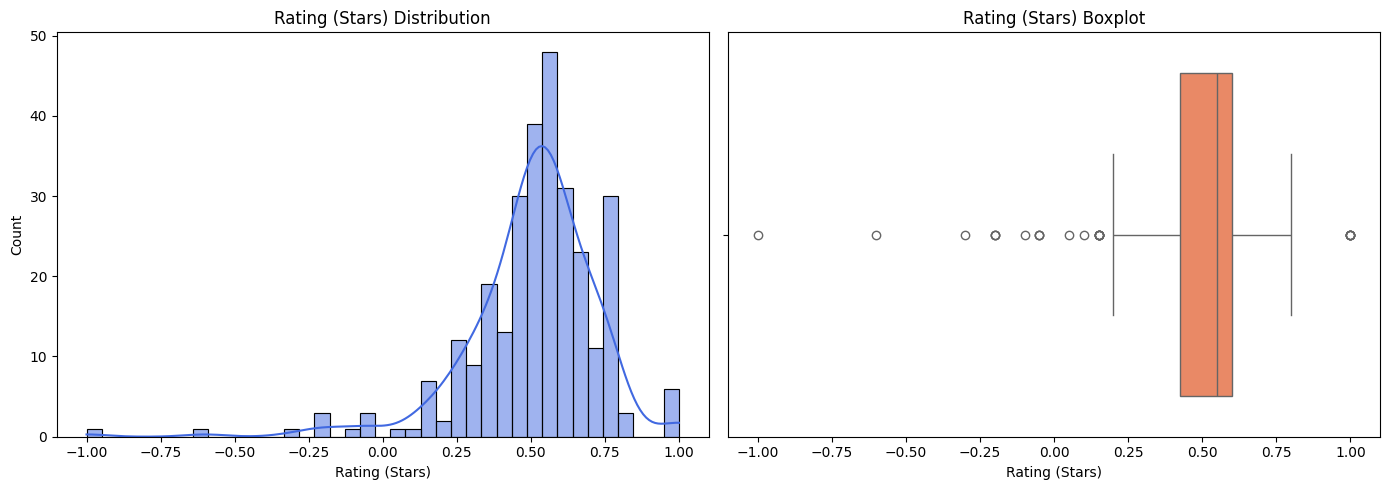

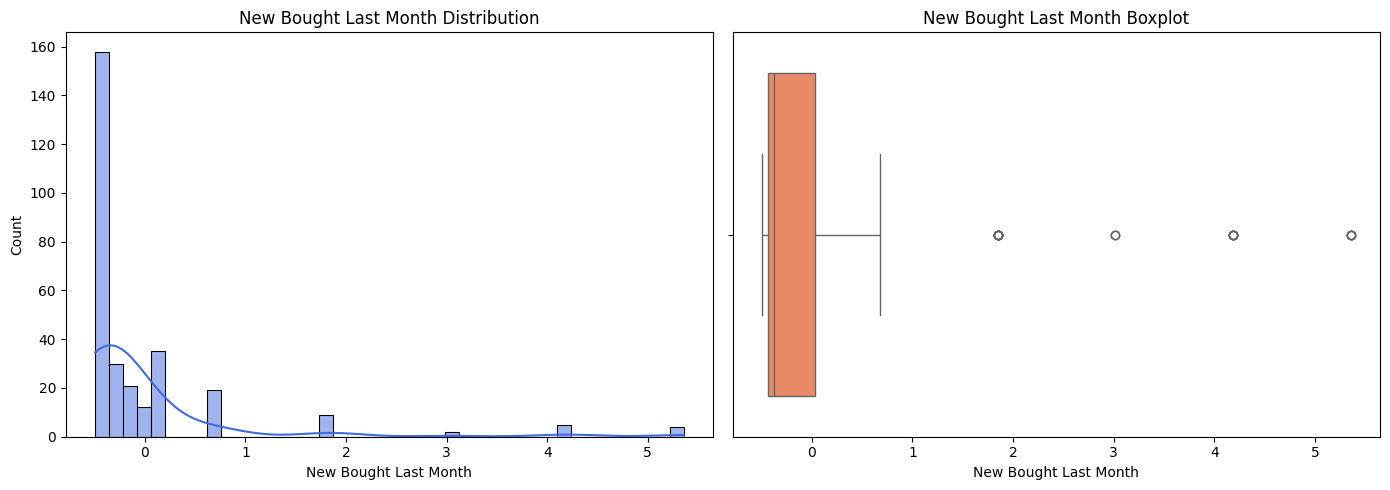

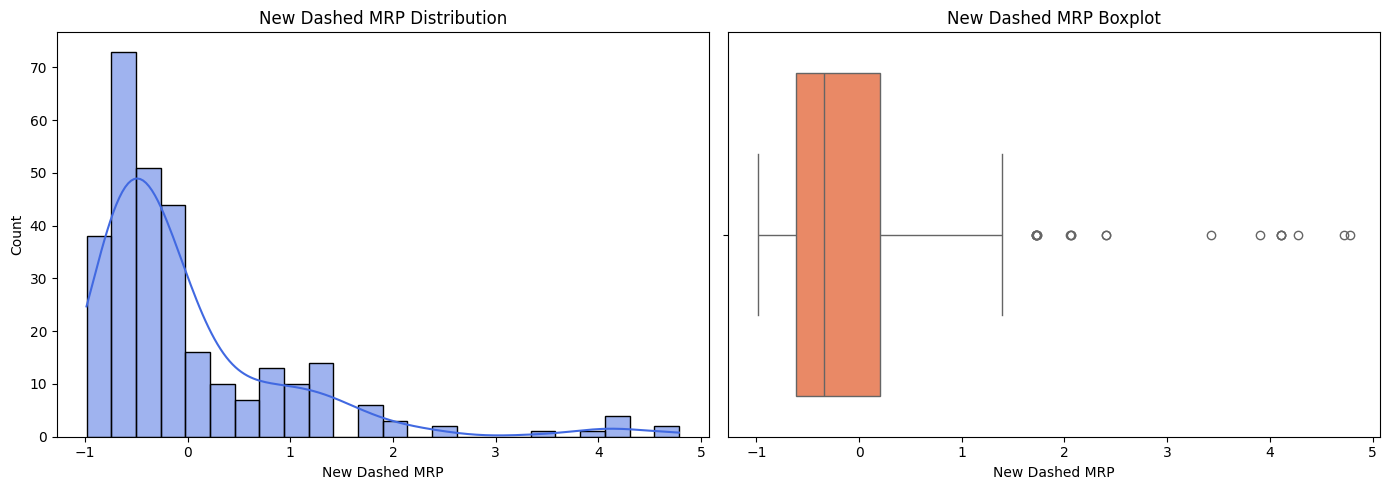

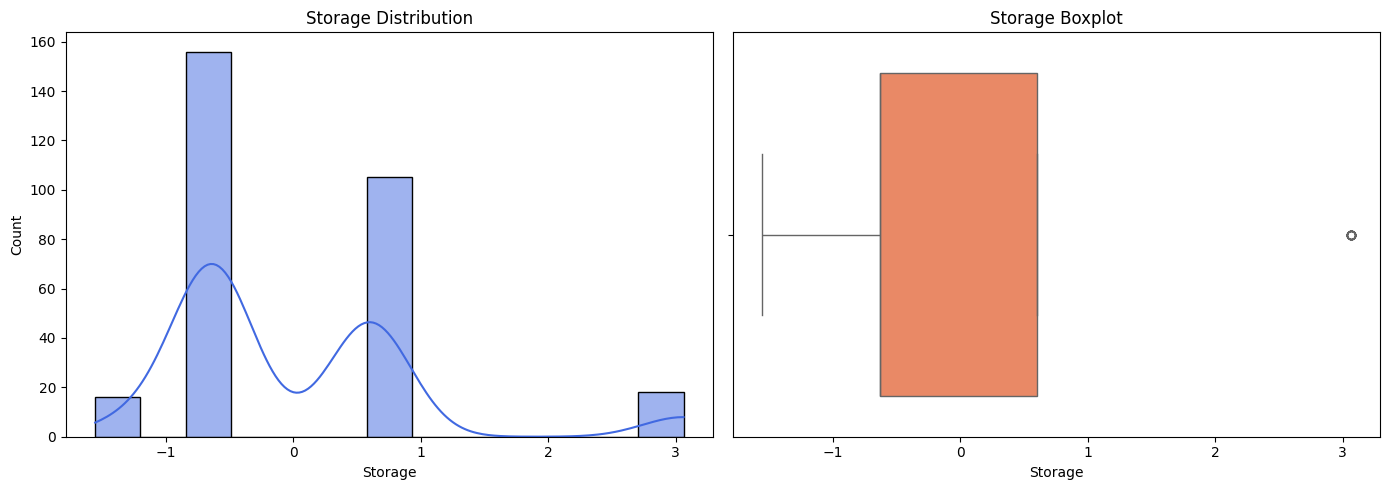

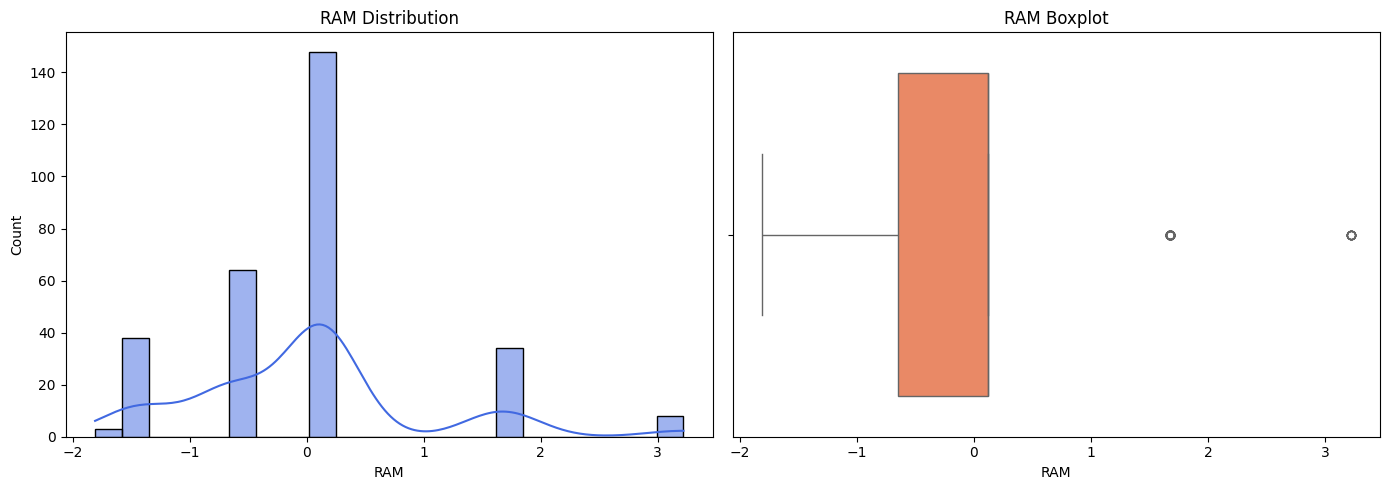

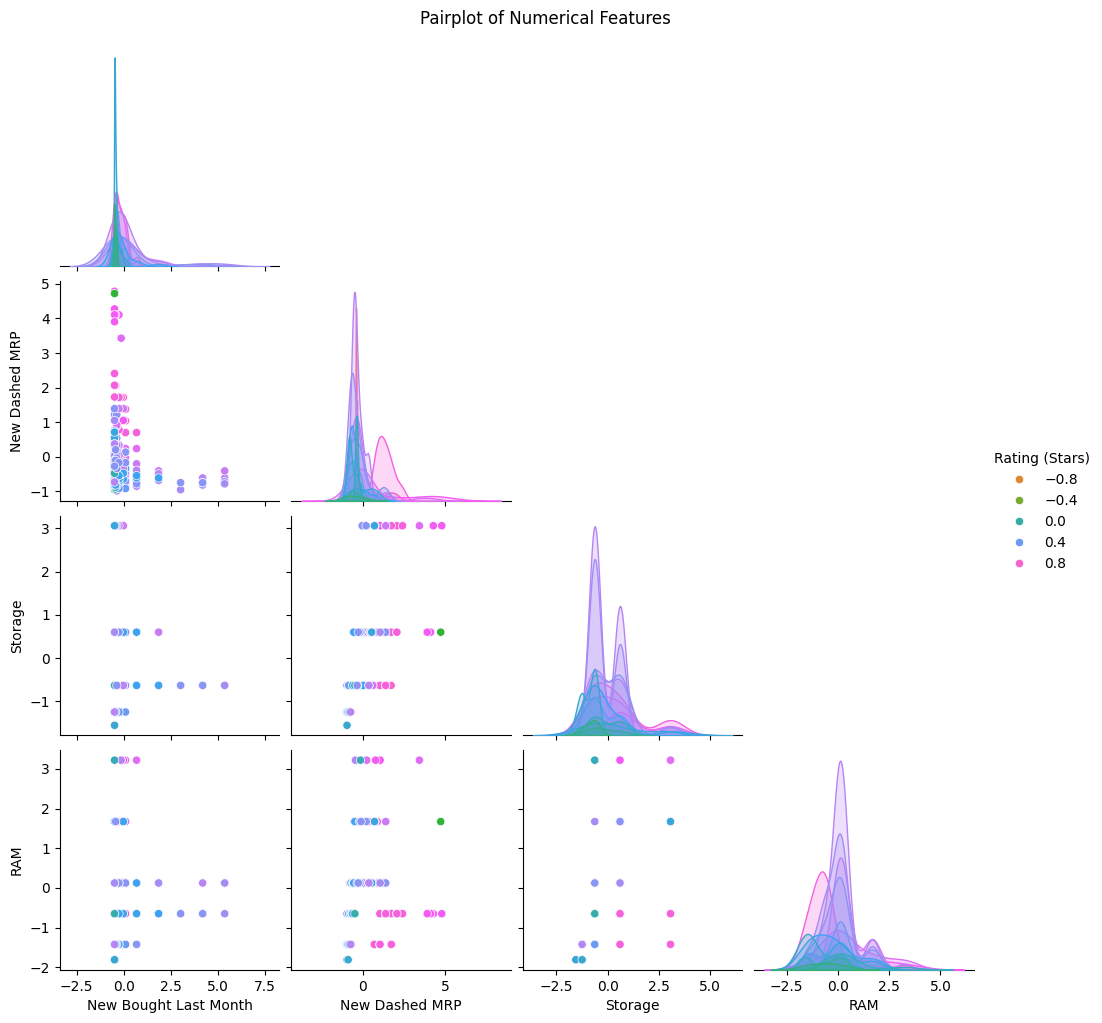

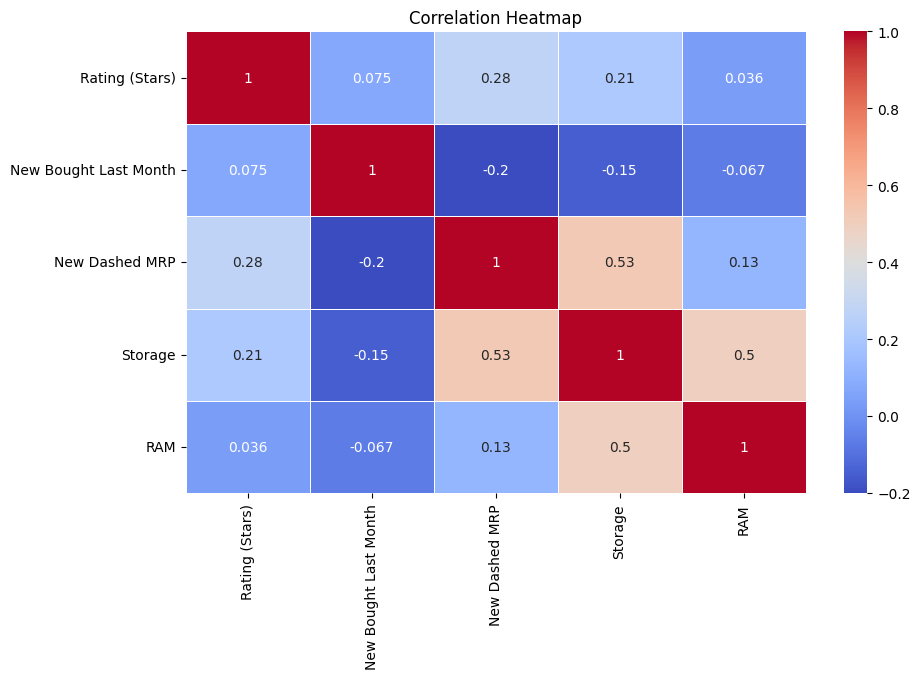

In [126]:
# --- Univariate Analysis ---
# Plotting histograms and boxplots for each numerical feature
numerical_features = ['Rating (Stars)', 'New Bought Last Month', 'New Dashed MRP', 'Storage', 'RAM']

for feature in numerical_features:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histogram
    sns.histplot(df[feature], kde=True, ax=axes[0], color='royalblue')
    axes[0].set_title(f'{feature} Distribution')
    
    # Boxplot
    sns.boxplot(x=df[feature], ax=axes[1], color='coral')
    axes[1].set_title(f'{feature} Boxplot')
    
    plt.tight_layout()
    plt.show()

# --- Multivariate Analysis ---
# Pairplot to visualize relationships between numerical features
sns.pairplot(df[numerical_features], hue='Rating (Stars)', palette='husl', corner=True)
plt.suptitle("Pairplot of Numerical Features", y=1.02)
plt.show()

# Heatmap to visualize correlations between features
plt.figure(figsize=(10, 6))
corr = df[numerical_features].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



**FEATURE ENGINEERING**

In [127]:
df = pd.read_csv('data_03.csv')
df.head()

,Rating (Stars),Number of Reviews,Free Delivery,Storage,New Bought Last Month,New Dashed MRP,New Discount (%),RAM,Brand_apple,Brand_oneplus,...,Color_Midnight,Color_Natural Titanium,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Starlight,Color_White,Color_White Titanium,Color_Yellow
0,0.70,-0.255460,-1,3.061859,-0.493483,4.274244,-0.552239,-0.649144,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.75,0.055031,-1,-0.628635,-0.376506,1.039580,-0.402985,-0.649144,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0.75,1.543834,-1,-0.628635,0.676284,0.710343,-0.283582,-1.422871,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.75,1.543834,-1,-0.628635,0.676284,0.700161,-0.283582,-1.422871,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0.75,1.543834,-1,-0.628635,0.091400,0.710343,-0.283582,-1.422871,1,0,...,0,0,1,0,0,0,0,0,0,0


In [128]:
df.columns

Index(['Rating (Stars)', 'Number of Reviews', 'Free Delivery', 'Storage',
       'New Bought Last Month', 'New Dashed MRP', 'New Discount (%)', 'RAM',
       'Brand_apple', 'Brand_oneplus', 'Brand_oppo', 'Brand_realme',
       'Brand_samsung', 'Brand_vivo', 'Brand_xiaomi', 'Color_Black',
       'Color_Black Titanium', 'Color_Blue', 'Color_Blue Titanium',
       'Color_Gold', 'Color_Gray', 'Color_Green', 'Color_Midnight',
       'Color_Natural Titanium', 'Color_Pink', 'Color_Purple', 'Color_Red',
       'Color_Silver', 'Color_Starlight', 'Color_White',
       'Color_White Titanium', 'Color_Yellow'],
      dtype='object')

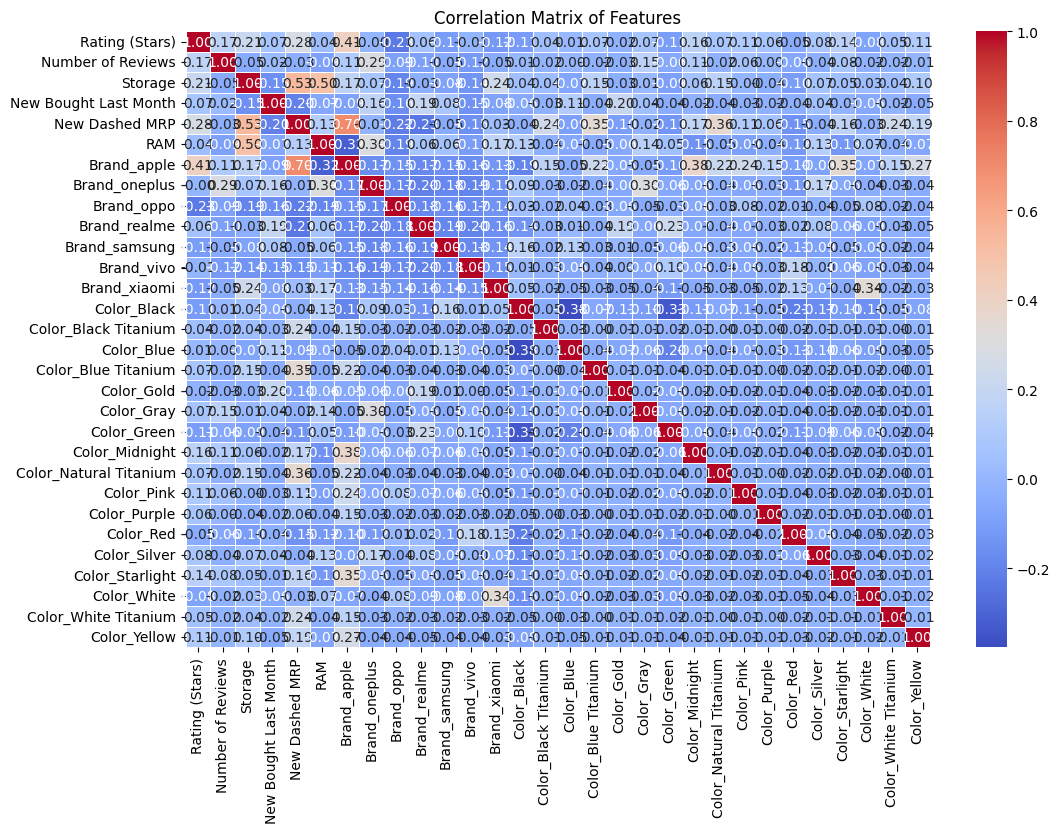

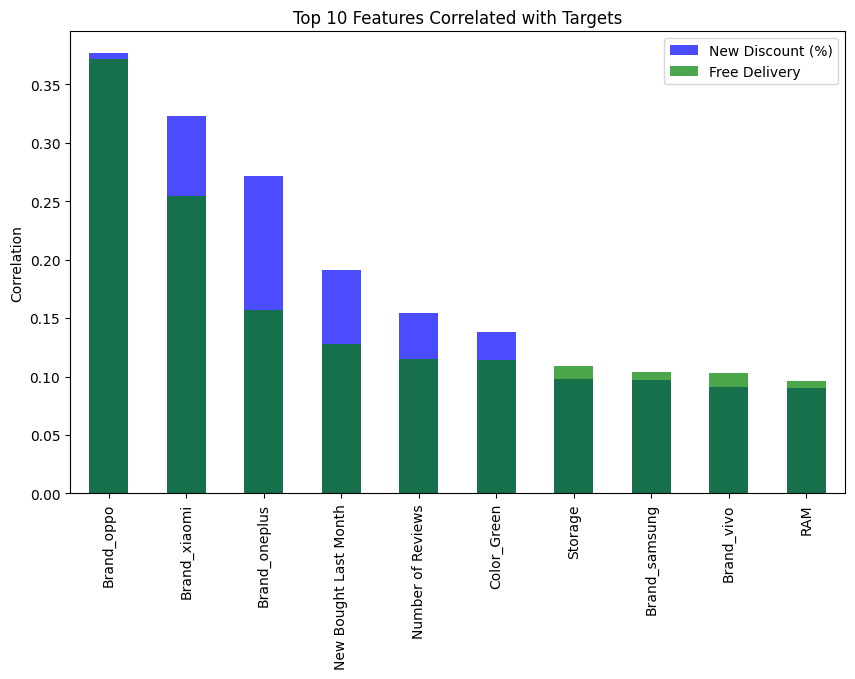

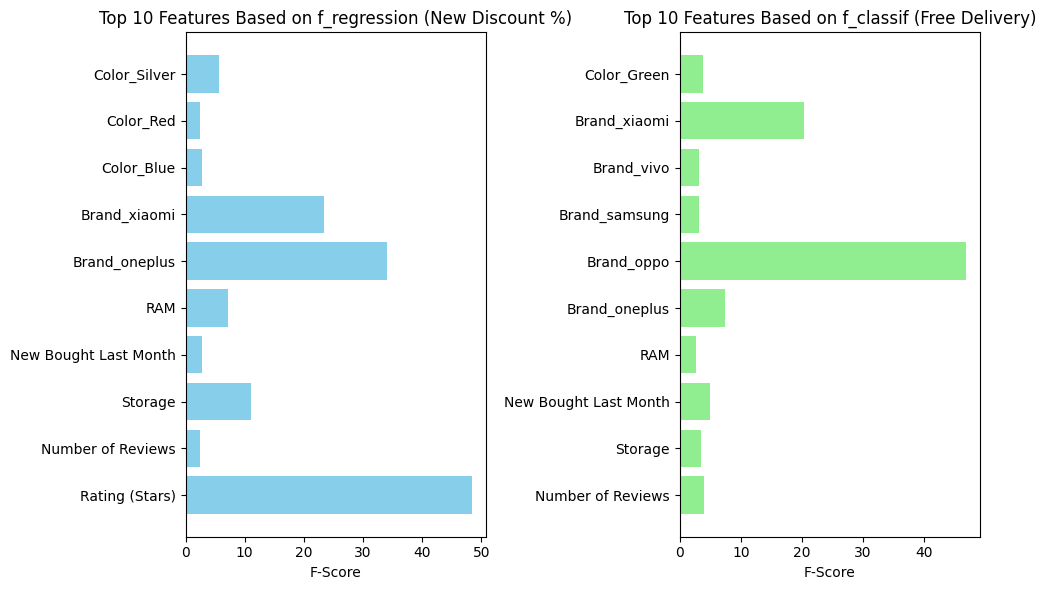

Top 10 Features Based on Correlation with New Discount (%):
Rating (Stars)           0.376396
Brand_oneplus            0.322884
Brand_xiaomi             0.271871
Storage                  0.191153
RAM                      0.154098
Color_Silver             0.137987
New Bought Last Month    0.097542
Color_Blue               0.096592
Color_Red                0.091298
Number of Reviews        0.089876
dtype: float64

Top 10 Features Based on Correlation with Free Delivery:
Brand_oppo               0.371321
Brand_xiaomi             0.254732
Brand_oneplus            0.157295
New Bought Last Month    0.128029
Number of Reviews        0.114723
Color_Green              0.114333
Storage                  0.108661
Brand_samsung            0.104066
Brand_vivo               0.103344
RAM                      0.095938
dtype: float64

Top 10 Features Based on SelectKBest (f_regression) for New Discount (%):
Index(['Rating (Stars)', 'Number of Reviews', 'Storage',
       'New Bought Last Month', 'RAM', '

In [129]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif, f_regression

# Load dataset
df = pd.read_csv('data_03.csv')

# Independent variables (X) and target variables (y)
X = df.drop(columns=['New Discount (%)', 'Free Delivery'])
y_discount = df['New Discount (%)']
y_free_delivery = df['Free Delivery']

### Step 1: Correlation Matrix ###
# Calculate correlation with both target variables
corr_discount = X.corrwith(y_discount).abs().sort_values(ascending=False)
corr_delivery = X.corrwith(y_free_delivery).abs().sort_values(ascending=False)

# Select top 10 features based on correlation
top10_corr_discount = corr_discount.head(10)
top10_corr_delivery = corr_delivery.head(10)

# Plot Correlation Heatmap for features and the target variables
plt.figure(figsize=(12, 8))
correlation_matrix = X.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Features")
plt.show()

# Plot Correlation with target variables
plt.figure(figsize=(10, 6))
top10_corr_discount.plot(kind='bar', color='blue', alpha=0.7, label='New Discount (%)')
top10_corr_delivery.plot(kind='bar', color='green', alpha=0.7, label='Free Delivery')
plt.title("Top 10 Features Correlated with Targets")
plt.ylabel('Correlation')
plt.legend()
plt.show()

### Step 2: SelectKBest ###

# Using f_regression for regression target (New Discount %)
selector_reg = SelectKBest(score_func=f_regression, k=10)
selector_reg.fit(X, y_discount)
top10_regression_features = X.columns[selector_reg.get_support()]
top10_reg_scores = selector_reg.scores_[selector_reg.get_support()]

# Using f_classif for classification target (Free Delivery)
selector_classif = SelectKBest(score_func=f_classif, k=10)
selector_classif.fit(X, y_free_delivery)
top10_classification_features = X.columns[selector_classif.get_support()]
top10_classif_scores = selector_classif.scores_[selector_classif.get_support()]

# Plot bar plot for SelectKBest scores
plt.figure(figsize=(10, 6))

# For f_regression (New Discount %)
plt.subplot(1, 2, 1)
plt.barh(top10_regression_features, top10_reg_scores, color='skyblue')
plt.title("Top 10 Features Based on f_regression (New Discount %)")
plt.xlabel("F-Score")

# For f_classif (Free Delivery)
plt.subplot(1, 2, 2)
plt.barh(top10_classification_features, top10_classif_scores, color='lightgreen')
plt.title("Top 10 Features Based on f_classif (Free Delivery)")
plt.xlabel("F-Score")

plt.tight_layout()
plt.show()

# --- Print Results ---
print("Top 10 Features Based on Correlation with New Discount (%):")
print(top10_corr_discount)

print("\nTop 10 Features Based on Correlation with Free Delivery:")
print(top10_corr_delivery)

print("\nTop 10 Features Based on SelectKBest (f_regression) for New Discount (%):")
print(top10_regression_features)

print("\nTop 10 Features Based on SelectKBest (f_classif) for Free Delivery:")
print(top10_classification_features)


In [130]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score

# Random Forest Regressor - Predicting New Discount %
# Selected Features for Regression
features_regression = ['Rating (Stars)', 'Number of Reviews', 'Storage',
                       'New Bought Last Month', 'RAM', 'Brand_oneplus', 'Brand_xiaomi',
                       'Color_Blue', 'Color_Red', 'Color_Silver']
X_regression = df[features_regression]
y_regression = df['New Discount (%)']

# Split the data into training and testing sets for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

# Create the Random Forest model for regression
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_reg.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_rf = rf_reg.predict(X_test_reg)

# Calculate Mean Squared Error (MSE)
mse_rf = mean_squared_error(y_test_reg, y_pred_rf)
print(f"Mean Squared Error (Random Forest) for New Discount (%): {mse_rf:.4f}")


# Logistic Regression - Predicting Free Delivery
# Selected Features for Classification
features_classification = ['Number of Reviews', 'Storage', 'New Bought Last Month', 'RAM',
                           'Brand_oneplus', 'Brand_oppo', 'Brand_samsung', 'Brand_vivo',
                           'Brand_xiaomi', 'Color_Green']
X_classification = df[features_classification]
y_classification = df['Free Delivery']

# Split the data into training and testing sets for classification
X_train_fd, X_test_fd, y_train_fd, y_test_fd = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Create the Logistic Regression model for classification
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train_fd, y_train_fd)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test_fd)

# Calculate the accuracy for classification
accuracy_log_reg = accuracy_score(y_test_fd, y_pred_log_reg)
print(f"Accuracy (Logistic Regression) for Free Delivery: {accuracy_log_reg:.4f}")


Mean Squared Error (Random Forest) for New Discount (%): 0.0781
Accuracy (Logistic Regression) for Free Delivery: 0.5593


In [131]:
import joblib
import pickle

# Export Random Forest Model for New Discount %
joblib.dump(rf_reg, 'random_forest_discount_model.pkl')  # Using joblib for RandomForest

# Export Logistic Regression Model for Free Delivery
pickle.dump(log_reg, open('logistic_regression_free_delivery_model.pkl', 'wb'))  # Using pickle for LogisticRegression


In [132]:
# When want to load it at some place, use the following code:

# # Load the Random Forest model (for New Discount %)
# rf_reg_loaded = joblib.load('random_forest_discount_model.pkl')

# # Load the Logistic Regression model (for Free Delivery)
# log_reg_loaded = pickle.load(open('logistic_regression_free_delivery_model.pkl', 'rb'))
